In [1]:
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import cm
import time


In [147]:
# DopplerNet without UA
#MODEL_PATH = "/home/shernandez/projects/DopplerNet/storage/logs/SpectralDopplerNet_IMPACT_Preprocessed_SERGI/KeypointRCNN+GCN+MSELoss/resnet_50/522222959/epoch_70_weights_SpectralDopplerNet_IMPACT_Preprocessed_SERGI_KeypointRCNN+GCN+MSELoss_best_kptsErr_0.pth"
# Keypoint RCNN
#MODEL_PATH = "/home/shernandez/projects/DopplerNet/storage/logs/SpectralDopplerNet_IMPACT_Preprocessed_SERGI/KeypointRCNN/resnet_50/522194528/epoch_72_weights_SpectralDopplerNet_IMPACT_Preprocessed_SERGI_KeypointRCNN_best_kptsErr_0.pth"
# DopplerNet with all anatomies
#MODEL_PATH = "/home/shernandez/projects/DopplerNet/storage/logs/SpectralDopplerNet_IMPACT_Preprocessed_SERGI/KeypointRCNN+GCN+MSELoss/resnet_50/604063614/epoch_74_weights_SpectralDopplerNet_IMPACT_Preprocessed_SERGI_KeypointRCNN+GCN+MSELoss_best_kptsErr_0.pth"
# Keypoint RCNN 80 epochs
MODEL_PATH = "/home/shernandez/projects/DopplerNet/storage/logs/SpectralDopplerNet_IMPACT_Preprocessed_SERGI/KeypointRCNN/resnet_50/604072217/epoch_80_weights_SpectralDopplerNet_IMPACT_Preprocessed_SERGI_KeypointRCNN_best_kptsErr_0.pth"
MODEL_PATH = MODEL_PATH

In [148]:
tab10_palette = cm.get_cmap("tab10").__dict__["colors"]

# Plot kpts
kpt_colors = [
    tab10_palette[0],
    tab10_palette[1],
    tab10_palette[2],
    tab10_palette[3],
    tab10_palette[4],
    tab10_palette[5],
    tab10_palette[6],
    tab10_palette[7],
    tab10_palette[8],
    tab10_palette[9]
]

AttributeError: 'numpy.ndarray' object has no attribute 'get_cmap'

In [149]:
import sys
sys.path.append('/home/shernandez/projects/DopplerNet')
from models import load_model

In [150]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

checkpoint = torch.load(MODEL_PATH,map_location=device)
print('freezed model epoch is %d' % checkpoint['epoch'])
if 'cfg' in checkpoint:
    print(checkpoint['cfg'])
    cfg = checkpoint['cfg']
    model = load_model(cfg, is_gpu=torch.cuda.is_available())
    model.load_state_dict(checkpoint['model_state_dict'])

for name, p in model.named_parameters():
    #if "kpts_decoder" in name: #freeze image encoder part only
    p.requires_grad = False

model.rpn.nms_thresh = 0.7
model.roi_heads.nms_thresh = 0.1

freezed model epoch is 80
AUG:
  METHOD: cycleDetect
  PROB: 0.5
DATA:
  PATH_TO_DATA_DIR: 
DATA_LOADER:
  ENABLE_MULTI_THREAD_DECODE: False
  NUM_WORKERS: 8
  OVERFIT: False
  PIN_MEMORY: True
EVAL:
  BATCH_SIZE: 4
  DATASET: malena
  EXAMPLES_TO_PLOT: 10
  INPUT_SIZE: 112
  MODE: normal
  NUM_WORKERS: 8
  WEIGHTS: 
INF:
  INPUT: 
  MODE: folder_sequence
  OUTPUT: 
  WEIGHTS: 
KPTS_EXTRACTOR_WEIGHTS: None
MODEL:
  BACKBONE: resnet_50
  LOSS_FUNC: ['IoU']
  NAME: KeypointRCNN
NUM_FRAMES: 1
SEED: 1234
SOLVER:
  BASE_LR: 0.0001
  OPTIMIZER: SGD
TRAIN:
  ALLOWED_KEYPOINTS: ['ejection beginning', 'mid upstroke', 'maximum velocity', 'mid deceleration point', 'ejection end', 'ejection beginning']
  BATCH_SIZE: 4
  CHECKPOINT_FILE_PATH: None
  DATASET: SpectralDopplerNet_IMPACT_Preprocessed_SERGI
  EPOCHS: 82
  EVAL_INTERVAL: 1
  INPUT_SIZE: 112
  INPUT_SIZE_IRR: [600, 300]
  NUM_CLASSES: 4
  NUM_KEYPOINTS: 6
  NUM_KPTS: 40
  OVERFIT: False
  WEIGHTS: None


/home/shernandez/miniconda3/envs/CycleDetect_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shernandez/miniconda3/envs/CycleDetect_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/shernandez/miniconda3/envs/CycleDetect_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/home/shernandez/miniconda3/envs/CycleDetect_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other th

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, 

In [151]:
import torch
import torchvision.transforms.functional as F
import torchvision

def inference (img_original):
    image = F.to_tensor(img_original)
    tr = torchvision.transforms.Compose([
            torchvision.transforms.Normalize(mean = [.5, .5, .5], std = [.5, .5, .5])
        ])
    image = tr(image)
    image = image.unsqueeze(0)

    image.to(device)
    model.eval()
    output = model(image)

    predictions = output[0]
    
    return predictions

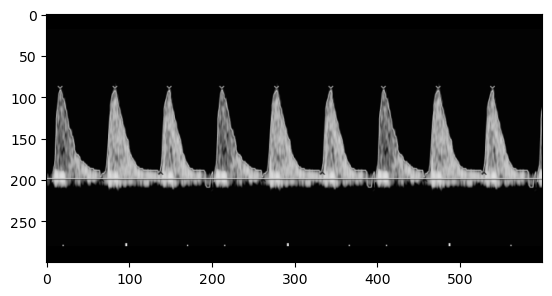

In [152]:
def nice_plot_only_gt(img_original, data):
    plt.clf()
    ax = plt.gca()
    plt.imshow(img_original)

    for bbox_id in range(len(data["bbox"])):
        #if bbox_id != 3 and bbox_id != 4:
        #    continue
        bbox = data["bbox"][bbox_id]
        rect = Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=3,edgecolor='lime',facecolor='none')
        #ax.add_patch(rect)
        i=0
        for kpt_id in range(len(data["kpts"][bbox_id])):
            if data["kpts_labels"][bbox_id][kpt_id] in cfg.TRAIN.ALLOWED_KEYPOINTS:
                kpt = data["kpts"][bbox_id][kpt_id]
                #ax.scatter(kpt[0], kpt[1], c = [kpt_colors[i]], s=56, linewidth=2,edgecolors='black')
                #ax.scatter(kpt[0], kpt[1], c = [kpt_colors[i]], s=48, linewidth=1,edgecolors='white')
                i+=1

    plt.show()


IMAGE = "/home/shernandez/data/SpectralDopplerNetPreprocessed/frames/inputs__Middle Cerebral Artery__1.2.276.0.26.1.1.1.2.2017.333.54471.4337544.778240.png"

img_path = IMAGE
annotations_path = IMAGE.replace(".png", ".npy").replace("/frames/", "/annotations/")
metadata_path = IMAGE.replace(".png", ".npy").replace("/frames/", "/metadata/")


img_original = cv2.imread(img_path)
data = np.load(annotations_path, allow_pickle=True).item()
metadata = np.load(metadata_path, allow_pickle=True).item()

nice_plot_only_gt(img_original, data)

In [153]:
def nice_plot(img_original, predictions, data, bbox_score_threshold=0.3):
    plt.clf()
    ax = plt.gca()
    plt.imshow(img_original)

    for bbox_id in range(len(data["bbox"])):
        bbox = data["bbox"][bbox_id]
        rect = Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=0.6,edgecolor='lime',facecolor='none')
        ax.add_patch(rect)
        i=0
        for kpt_id in range(len(data["kpts"][bbox_id])):
            if data["kpts_labels"][bbox_id][kpt_id] in cfg.TRAIN.ALLOWED_KEYPOINTS:
                kpt = data["kpts"][bbox_id][kpt_id]
                ax.scatter(kpt[0], kpt[1], c = [kpt_colors[i]], s=17, linewidth=1,edgecolors='white')
                i+=1

    if len(predictions["labels"])==0:
        plt.show()
        return 0
    # IMPORTANT: the NMS built in FasterRCNN only eliminates overlapping boxes of the same label
    label = np.bincount(predictions["labels"]).argmax() # Returns the most common box label
    valid_boxes = predictions["labels"]==label # To mask the boxes that match the label

    for bbox_id in range(len(predictions["boxes"][valid_boxes])):
        bbox = predictions["boxes"][valid_boxes][bbox_id]
        if predictions["scores"][valid_boxes][bbox_id] > bbox_score_threshold:
            rect = Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
            for kpt_id in range(len(predictions["keypoints"][valid_boxes][bbox_id])):
                kpt = predictions["keypoints"][valid_boxes][bbox_id][kpt_id]
                ax.scatter(kpt[0], kpt[1], c = [kpt_colors[kpt_id]], s=15, linewidth=1,edgecolors='black')
    print("Predicted label:",label)
    plt.show()

Predicted label: 2


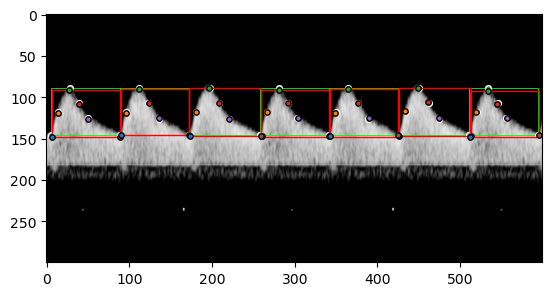

In [154]:
#IMAGE = "/home/shernandez/data/SpectralDopplerNetPreprocessed/frames/inputs__Uterine Artery__1.2.276.0.26.1.1.1.2.2019.125.56235.7642058.12451840.png"
#IMAGE = "/home/shernandez/data/SpectralDopplerNetPreprocessed/frames/inputs__Middle Cerebral Artery__1.2.276.0.26.1.1.1.2.2017.333.54471.4337544.778240.png"
IMAGE = "/home/shernandez/data/SpectralDopplerNetPreprocessed/frames/inputs__Umbilical Artery__1.2.276.0.26.1.1.1.2.2018.178.48167.1637997.12451840.png"
#IMAGE = "/home/shernandez/data/SpectralDopplerNetPreprocessed/frames/inputs__Umbilical Artery__1.2.276.0.26.1.1.1.2.2019.59.55428.5410479.12451840.png"
IMAGE = "/home/shernandez/data/SpectralDopplerNetPreprocessed/frames/inputs__Umbilical Artery__1.2.276.0.26.1.1.1.2.2019.338.59691.7330610.12451840.png"

img_path = IMAGE
annotations_path = IMAGE.replace(".png", ".npy").replace("/frames/", "/annotations/")
metadata_path = IMAGE.replace(".png", ".npy").replace("/frames/", "/metadata/")


img_original = cv2.imread(img_path)
data = np.load(annotations_path, allow_pickle=True).item()
metadata = np.load(metadata_path, allow_pickle=True).item()

predictions = inference(img_original)
#print(predictions["keypoints_scores"])
nice_plot(img_original, predictions, data)

In [155]:
metadata = np.load(metadata_path.replace("SpectralDopplerNetPreprocessed", "DopplerNetPreprocessed"), allow_pickle=True)

metadata

array({'gen': {'min_x': 226, 'min_y': 226, 'zero_line': 226, 'physical_delta_x': 0.002222222276031971, 'physical_delta_y': 0.29888585209846497}, 'crop': {'x_shift': 0, 'y_shift': 72, 'ratio': 0.47206923682140045, 'margin': 0}},
      dtype=object)

In [156]:
folder_aa = "/home/shernandez/data/DopplerNetPreprocessed/metadata/"
ratios = []
for filename in os.listdir(folder_aa):
    metadata = np.load(folder_aa+filename, allow_pickle=True).item()
    ratio = metadata["crop"]["ratio"]
    ratios.append(ratio)

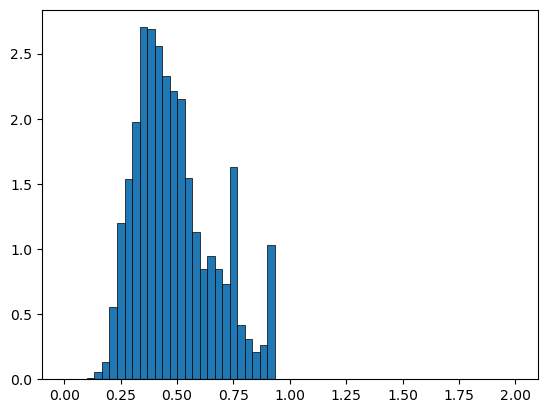

0.48979383521704445
0.45558086560364464


In [157]:
plt.hist(ratios, range=(0, 2), bins=60, linewidth=0.5, edgecolor="black", density=True)
plt.show()
print(np.mean(ratios))
print(np.median(ratios))


In [158]:
#print(predictions["boxes"][1])
for b in predictions["boxes"]:
    print(b)
for b in data["bbox"]:
    print(b)
#print(predictions["keypoints"][1])
#for a in data["kpts"]:
#    print(a)

tensor([  6.0722,  91.4293,  88.3717, 147.7374])
tensor([425.8174,  88.3238, 512.8722, 147.3259])
tensor([259.5900,  90.9671, 341.4179, 147.5612])
tensor([512.2860,  92.4892, 595.5703, 148.5581])
tensor([342.2193,  89.3336, 425.2975, 147.3703])
tensor([ 89.2346,  89.5227, 172.6589, 145.6854])
tensor([172.6661,  88.6595, 259.5937, 146.6665])
[  5  89  88 146]
[ 88  89 172 146]
[172  89 258 146]
[258  89 341 146]
[341  89 426 146]
[426  89 511 146]
[511  89 594 146]


# COMPUTE LOSSES

In [159]:
def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two bounding boxes.
    """
    x1_tl, y1_tl, x1_br, y1_br = box1
    x2_tl, y2_tl, x2_br, y2_br = box2
    
    # Calculate the coordinates of the intersection rectangle
    x_left = max(x1_tl, x2_tl)
    y_top = max(y1_tl, y2_tl)
    x_right = min(x1_br, x2_br)
    y_bottom = min(y1_br, y2_br)

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # Calculate intersection area
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Calculate the area of both bounding boxes
    box1_area = (x1_br - x1_tl) * (y1_br - y1_tl)
    box2_area = (x2_br - x2_tl) * (y2_br - y2_tl)

    # Calculate the union area
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area
    return iou

def calculate_distance(keypoint1, keypoint2):
    """
    Calculate Euclidean distance between two keypoints.
    """
    return np.sqrt((keypoint1[0] - keypoint2[0])**2 + (keypoint1[1] - keypoint2[1])**2)

def calculate_x_distance(keypoint1, keypoint2, metadata):
    return np.abs((keypoint1[0] - keypoint2[0])) * metadata["gen"]["physical_delta_x"] * (1/metadata["crop"]["ratio"])

def calculate_y_distance(keypoint1, keypoint2, metadata):
    return np.abs((keypoint1[1] - keypoint2[1])) * metadata["gen"]["physical_delta_y"] * (1/metadata["crop"]["ratio"])

def evaluate_keypoints(predictions, ground_truths, metadata, iou_threshold=0.8):
    """
    Evaluate keypoint predictions against ground truths.
    """
    num_predictions = len(predictions["boxes"])
    num_ground_truths = len(ground_truths["bbox"])


    keypoint_labels_allowed = ["ejection beginning", "mid upstroke", "maximum velocity", "mid deceleration point", "ejection end"]
    distances = []
    distances_by_type_of_keypoint = {}
    x_distances_by_type_of_keypoint = {}
    y_distances_by_type_of_keypoint = {}
    for l in keypoint_labels_allowed:
        distances_by_type_of_keypoint[l] = []
        x_distances_by_type_of_keypoint[l] = []
        y_distances_by_type_of_keypoint[l] = []

    # Initialize TP, FP, FN counters
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    if num_predictions == 0:
        return distances, distances_by_type_of_keypoint, 0, 0, num_ground_truths
    
    # IMPORTANT: the NMS built in FasterRCNN only eliminates overlapping boxes of the same label
    label = np.bincount(predictions["labels"]).argmax() # Returns the most common box label
    valid_boxes = predictions["labels"]==label # To mask the boxes that match the label
    # Sort the predicted bounding boxes by x coordinate
    x_coordinates = predictions["boxes"][valid_boxes][:, 0]
    sorted_indices = np.argsort(x_coordinates)

    num_predictions = len(predictions["boxes"][valid_boxes]) # Update num of predictions to be only the valid ones

    # Iterate through predicted bounding boxes
    for bbox_id in range(len(predictions["boxes"][valid_boxes][sorted_indices])):
        pred_box = predictions["boxes"][valid_boxes][sorted_indices][bbox_id]
        pred_keypoints = predictions["keypoints"][valid_boxes][sorted_indices][bbox_id]
        if predictions["scores"][valid_boxes][sorted_indices][bbox_id] < 0.99:
            if predictions["scores"][valid_boxes][sorted_indices][bbox_id] >= 0.3:
                print("Rejecting otherwise not rejected box")
            num_predictions -= 1 # if predicted bbox does not pass the score threshold, it is not even a prediction
            continue
        # Check if any ground truth bounding box matches the predicted bounding box
        matched_gt_id = None
        for gt_bbox_id in range(len(data["bbox"])):
            gt_bbox = data["bbox"][gt_bbox_id]
            iou = calculate_iou(pred_box, gt_bbox)
            if iou >= iou_threshold:
                matched_gt_id = gt_bbox_id
                true_positives += 1
                break
        
        if matched_gt_id:
            # If a match is found, check keypoint accuracy
            gt_keypoints = data["kpts"][matched_gt_id]
            gt_keypoints = np.array(gt_keypoints)
            gt_keypoint_labels = data["kpts_labels"][matched_gt_id]
            # Filter keypoints
            mask = np.isin(gt_keypoint_labels, keypoint_labels_allowed)
            filtered_keypoints = gt_keypoints[mask]
            filtered_labels = gt_keypoint_labels[mask]
            gt_keypoints = filtered_keypoints.copy()

            correct_keypoints = 0
            for pred_kp, gt_kp, kp_label in zip(pred_keypoints, gt_keypoints, filtered_labels):
                distance = calculate_distance(pred_kp, gt_kp)
                x_distance = calculate_x_distance(pred_kp, gt_kp, metadata)
                y_distance = calculate_y_distance(pred_kp, gt_kp, metadata)
                distances.append(distance.item())
                distances_by_type_of_keypoint[kp_label].append(distance.item())
                x_distances_by_type_of_keypoint[kp_label].append(x_distance.item())
                y_distances_by_type_of_keypoint[kp_label].append(y_distance.item())

    
    # TODO: IT WOULD BE VERY USEFUL TO COMPUTE:
    # - True Positives: THE AMOUNT OF BBOXES CORRECTLY IDENTIFIED (THOSE WITH GOOD IoU) ,
    # - False positives: WHERE A BBOX WAS PREDICTED BUT NO REAL BBOX HAS A GOOD IOU, 
    # - True Negatives: -
    # - False Negatives: # of real BBOXES minus (-) # of True Positives
    false_positives = num_predictions - true_positives
    false_negatives = num_ground_truths - true_positives
    
    return distances, distances_by_type_of_keypoint, true_positives, false_positives, false_negatives, x_distances_by_type_of_keypoint, y_distances_by_type_of_keypoint

In [160]:
# Iterate over the test filenames
TEST_DATASET_LIST_TXT = "/home/shernandez/data/SpectralDopplerNetPreprocessed/filenames/doppler_val_filenames.txt"
DATA_ROOT = "/home/shernandez/data/SpectralDopplerNetPreprocessed"

tr = torchvision.transforms.Compose([
        torchvision.transforms.Normalize(mean = [.5, .5, .5], std = [.5, .5, .5])
    ])

img_list_from_file = []
with open(TEST_DATASET_LIST_TXT) as f:
    img_list_from_file.extend(f.read().splitlines())

errors = []
errors_by_label = {
    "ejection beginning": [],
    "mid upstroke": [],
    "maximum velocity": [],
    "mid deceleration point": [],
    "ejection end": [],
}


errors_by_anatomy = {
    anatomy: {
        "ejection beginning": [],
        "mid upstroke": [],
        "maximum velocity": [],
        "mid deceleration point": [],
        "ejection end": [],
    } for anatomy in ["Umbilical Artery", "Uterine Artery", "Middle Cerebral Artery"]
}

x_errors_by_anatomy = {
    anatomy: {
        "ejection beginning": [],
        "mid upstroke": [],
        "maximum velocity": [],
        "mid deceleration point": [],
        "ejection end": [],
    } for anatomy in ["Umbilical Artery", "Uterine Artery", "Middle Cerebral Artery"]
}

y_errors_by_anatomy = {
    anatomy: {
        "ejection beginning": [],
        "mid upstroke": [],
        "maximum velocity": [],
        "mid deceleration point": [],
        "ejection end": [],
    } for anatomy in ["Umbilical Artery", "Uterine Artery", "Middle Cerebral Artery"]
}

label_map = {"Uterine Artery": 1, "Umbilical Artery": 2, "Middle Cerebral Artery": 3}

inference_times = []
precisions = []
recalls = []
true_positives = 0
false_positives = 0
false_negatives = 0
real_class = []
predicted_class = []
    
for filename in img_list_from_file:
    #print("Processing...", filename)
    img_path = DATA_ROOT+"/frames/"+filename
    annotations_path = img_path.replace(".png", ".npy").replace("/frames/", "/annotations/")
    metadata_path = img_path.replace(".png", ".npy").replace("/frames/", "/metadata/")

    if "Umbilical Artery" not in filename and "Uterine Artery" not in filename and "Middle Cerebral Artery" not in filename:
        continue
    elif "Umbilical Artery" in filename:
        real_anatomy = "Umbilical Artery"
    elif "Uterine Artery" in filename:
        real_anatomy = "Uterine Artery"
    elif "Middle Cerebral Artery" in filename:
        real_anatomy = "Middle Cerebral Artery"
    
    real_class.append(label_map[real_anatomy])

    img_original = cv2.imread(img_path)
    data = np.load(annotations_path, allow_pickle=True).item()
    metadata = np.load(metadata_path.replace("SpectralDopplerNetPreprocessed", "DopplerNetPreprocessed"), allow_pickle=True).item()

    start_time = time.time()
    
    image = F.to_tensor(img_original)
    image = tr(image)
    image = image.unsqueeze(0)

    image.to(device)
    model.eval()
    output = model(image)

    end_time = time.time()
    inference_time = end_time - start_time
    inference_times.append(inference_time)

    predictions = output[0]

    distances, distance_by_label, tp, fp, fn, x_dist_by_label, y_dist_by_label = evaluate_keypoints(predictions, data, metadata)
    
    #nice_plot(img_original, predictions, data)
    #print(distances)
    #print(distance_by_label)
    #print("True positives:", tp)
    #print("False positives:", fp)
    #print("False negatives:", fn)

    all_errors = [error for a in list(distance_by_label.values()) for error in list(a)]
    if len(all_errors) == 0:
        pass
    #    nice_plot(img_original, predictions, data)
    else:
        average_error_in_image = sum(all_errors) / len(all_errors)
        #print("AVERAGE ERROR IN IMAGE:", average_error_in_image)
        if average_error_in_image < 1.2 or average_error_in_image>7: # For keypoint rcnn 1.2<e<7, for dopplernet 2<e<7
            print("AVERAGE ERROR IN IMAGE:", average_error_in_image)
            #nice_plot(img_original, predictions, data)

    errors.extend(distances)
    for k in errors_by_label.keys():
        errors_by_label[k].extend(distance_by_label[k])
        errors_by_anatomy[real_anatomy][k].extend(distance_by_label[k])
        x_errors_by_anatomy[real_anatomy][k].extend(x_dist_by_label[k])
        y_errors_by_anatomy[real_anatomy][k].extend(y_dist_by_label[k])

    if tp+fp != 0:
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        #print("BOUNDING BOXES FOUND for", real_anatomy)
    else:
        #print("NO BOUNDING BOXES FOUND!!!!", real_anatomy)
        precision = 0
        recall = 0
    true_positives += tp
    false_positives += fp
    false_negatives += fn
    precisions.append(precision)
    recalls.append(recall)
    if len(predictions["labels"]>0):
        label = np.bincount(predictions["labels"]).argmax()
        #print("Predicted label:",  label)
        predicted_class.append(label)
    else:
        predicted_class.append(0)



Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
AVERAGE ERROR IN IMAGE: 0.9874456968779365
AVERAGE ERROR IN IMAGE: 1.1858417349202293
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not rejected box
Rejecting otherwise not re

In [161]:
print("Average precission", round(np.mean(precisions), 4)*100)
print("Real precission", round(true_positives/(true_positives+false_positives), 4)*100)
print("Average recall", round(np.mean(recalls), 4)*100)
print("Real recall", round(true_positives/(true_positives+false_negatives), 4)*100)


Average precission 92.9
Real precission 96.6
Average recall 89.55
Real recall 89.89


47.489967346191406
2.6345613550415385
0.010759147815406322


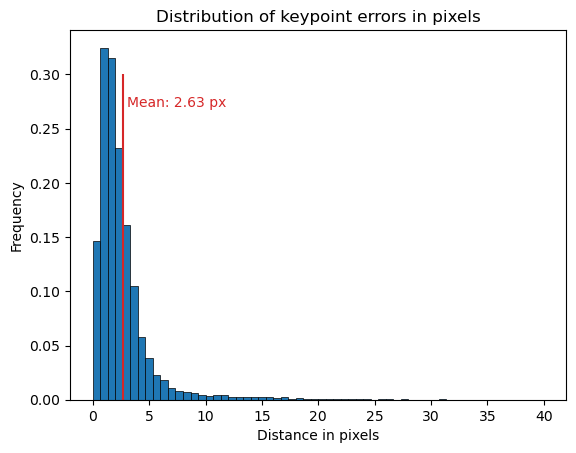

In [162]:
print(max(errors))
print(np.mean(errors))
print(min(errors))

plt.hist(errors, range=(0, 40), bins=60, linewidth=0.5, edgecolor="black", density=True)
plt.vlines(np.mean(errors), 0, 0.3, colors=["tab:red"])
plt.text(np.mean(errors)+0.4, 0.27, f"Mean: {round(np.mean(errors), 2)} px", c="tab:red")
plt.title("Distribution of keypoint errors in pixels")
plt.xlabel("Distance in pixels")
plt.ylabel("Frequency")
plt.show()

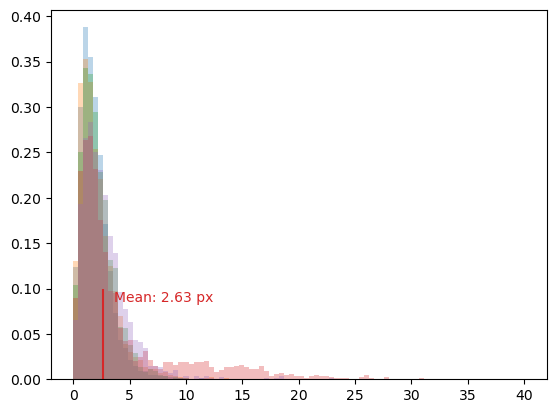

In [163]:
plt.hist(errors_by_label["ejection beginning"], range=(0, 40), bins=90, density=True, alpha=0.3)
plt.hist(errors_by_label["mid upstroke"], range=(0, 40), bins=90, density=True, alpha=0.3)
plt.hist(errors_by_label["maximum velocity"], range=(0, 40), bins=90, density=True, alpha=0.3)
plt.hist(errors_by_label["mid deceleration point"], range=(0, 40), bins=90, density=True, alpha=0.3)
plt.hist(errors_by_label["ejection end"], range=(0, 40), bins=90, density=True, alpha=0.3)
plt.vlines(np.mean(errors), 0, 0.1, colors=["tab:red"])
plt.text(np.mean(errors)+1, 0.085, f"Mean: {round(np.mean(errors), 2)} px", c="tab:red")
plt.show()

18.099565505981445
2.011489917324176
0.016757825389504433


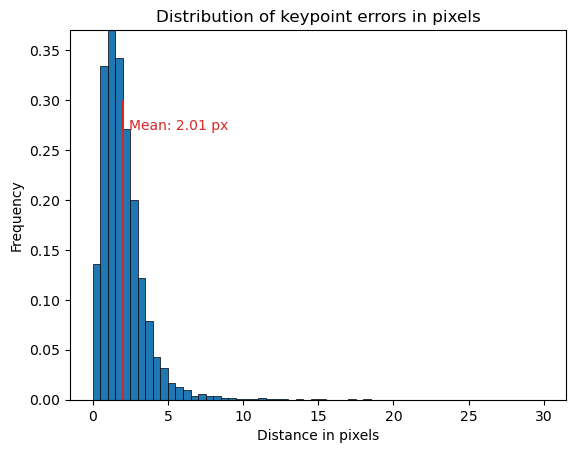

In [164]:
print(max(errors_by_label["ejection beginning"]))
print(np.mean(errors_by_label["ejection beginning"]))
print(min(errors_by_label["ejection beginning"]))

plt.hist(errors_by_label["ejection beginning"], range=(0, 30), bins=60, linewidth=0.5, edgecolor="black", density=True, color=kpt_colors[0])
plt.vlines(np.mean(errors_by_label["ejection beginning"]), 0, 0.3, colors=["tab:red"])
plt.text(np.mean(errors_by_label["ejection beginning"])+0.4, 0.27, f"Mean: {round(np.mean(errors_by_label['ejection beginning']), 2)} px", c="tab:red")
plt.title("Distribution of keypoint errors in pixels")
plt.xlabel("Distance in pixels")
plt.ylabel("Frequency")
plt.ylim(0, 0.37)
plt.show()


33.81588363647461
2.204257962257211
0.028344055637717247


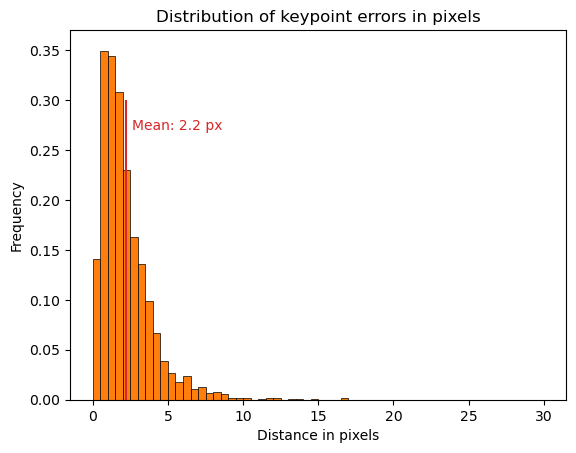

In [165]:
anatomy = "mid upstroke"
print(max(errors_by_label[anatomy]))
print(np.mean(errors_by_label[anatomy]))
print(min(errors_by_label[anatomy]))

plt.hist(errors_by_label[anatomy], range=(0, 30), bins=60, linewidth=0.5, edgecolor="black", density=True, color=kpt_colors[1])
plt.vlines(np.mean(errors_by_label[anatomy]), 0, 0.3, colors=["tab:red"])
plt.text(np.mean(errors_by_label[anatomy])+0.4, 0.27, f"Mean: {round(np.mean(errors_by_label[anatomy]), 2)} px", c="tab:red")
plt.title("Distribution of keypoint errors in pixels")
plt.xlabel("Distance in pixels")
plt.ylabel("Frequency")
plt.ylim(0, 0.37)
plt.show()

26.87412452697754
2.250977242852073
0.01472268532961607


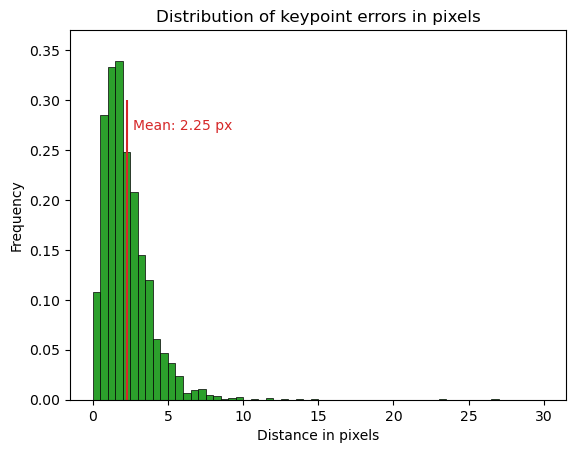

In [166]:
anatomy = "maximum velocity"
print(max(errors_by_label[anatomy]))
print(np.mean(errors_by_label[anatomy]))
print(min(errors_by_label[anatomy]))

plt.hist(errors_by_label[anatomy], range=(0, 30), bins=60, linewidth=0.5, edgecolor="black", density=True, color=kpt_colors[2])
plt.vlines(np.mean(errors_by_label[anatomy]), 0, 0.3, colors=["tab:red"])
plt.text(np.mean(errors_by_label[anatomy])+0.4, 0.27, f"Mean: {round(np.mean(errors_by_label[anatomy]), 2)} px", c="tab:red")
plt.title("Distribution of keypoint errors in pixels")
plt.xlabel("Distance in pixels")
plt.ylabel("Frequency")
plt.ylim(0, 0.37)
plt.show()

47.489967346191406
4.4656534506292065
0.010759147815406322


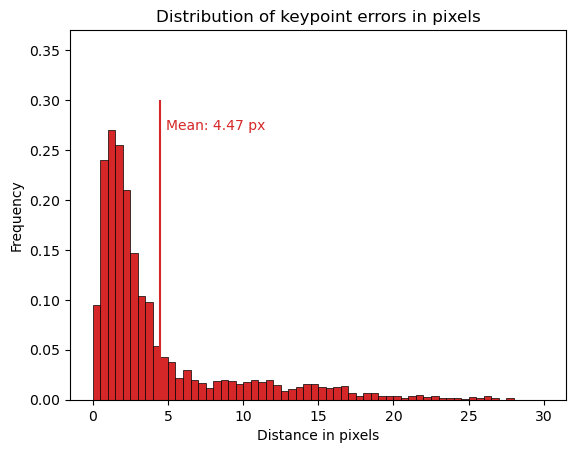

In [167]:
anatomy = "mid deceleration point"
print(max(errors_by_label[anatomy]))
print(np.mean(errors_by_label[anatomy]))
print(min(errors_by_label[anatomy]))

plt.hist(errors_by_label[anatomy], range=(0, 30), bins=60, linewidth=0.5, edgecolor="black", density=True, color=kpt_colors[3])
plt.vlines(np.mean(errors_by_label[anatomy]), 0, 0.3, colors=["tab:red"])
plt.text(np.mean(errors_by_label[anatomy])+0.4, 0.27, f"Mean: {round(np.mean(errors_by_label[anatomy]), 2)} px", c="tab:red")
plt.title("Distribution of keypoint errors in pixels")
plt.xlabel("Distance in pixels")
plt.ylabel("Frequency")
plt.ylim(0, 0.37)
plt.show()

31.751745223999023
2.8634996398623884
0.06622423976659775


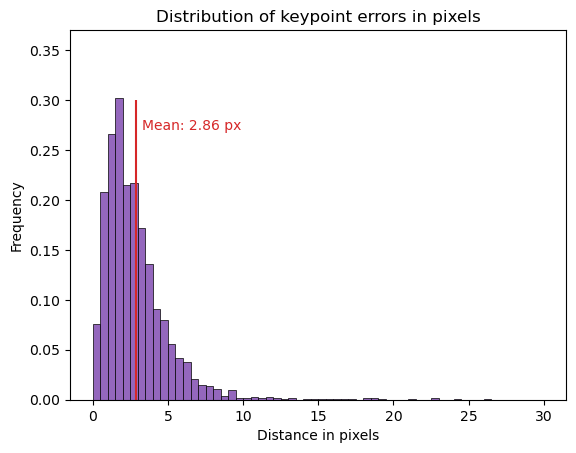

In [168]:
anatomy = "ejection end"
print(max(errors_by_label[anatomy]))
print(np.mean(errors_by_label[anatomy]))
print(min(errors_by_label[anatomy]))

plt.hist(errors_by_label[anatomy], range=(0, 30), bins=60, linewidth=0.5, edgecolor="black", density=True, color=kpt_colors[4])
plt.vlines(np.mean(errors_by_label[anatomy]), 0, 0.3, colors=["tab:red"])
plt.text(np.mean(errors_by_label[anatomy])+0.4, 0.27, f"Mean: {round(np.mean(errors_by_label[anatomy]), 2)} px", c="tab:red")
plt.title("Distribution of keypoint errors in pixels")
plt.xlabel("Distance in pixels")
plt.ylabel("Frequency")
plt.ylim(0, 0.37)
plt.show()

In [169]:
print("Inference time:", round(np.mean(inference_times), 4), "s")
print("Frame rate:", round(1/np.mean(inference_times), 4), "FPS")

Inference time: 1.0268 s
Frame rate: 0.9739 FPS


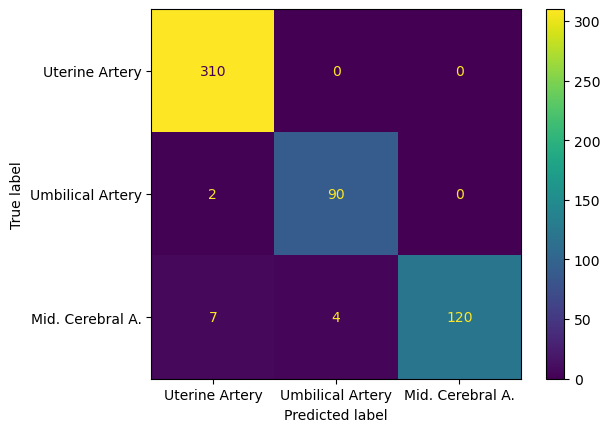

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ["Uterine Artery", "Umbilical Artery", "Mid. Cerebral A."]
cm = confusion_matrix(real_class, predicted_class, labels=list(label_map.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [171]:
means_by_anatomy = {}
errors_only_by_anatomy = {}
for cycle_class in errors_by_anatomy.keys():
    means_by_anatomy[cycle_class] = {}
    errors_only_by_anatomy[cycle_class] = {}
    all_errors_of_this_anatomy = []
    for kpt_label in errors_by_anatomy[cycle_class]:
        all_errors_of_this_anatomy += errors_by_anatomy[cycle_class][kpt_label]
        mean = sum(errors_by_anatomy[cycle_class][kpt_label]) / len(errors_by_anatomy[cycle_class][kpt_label])
        means_by_anatomy[cycle_class][kpt_label] = round(mean, 2)
    mean = sum(all_errors_of_this_anatomy) / len(all_errors_of_this_anatomy)
    errors_only_by_anatomy[cycle_class] = round(mean,2)


In [172]:
import pandas as pd
pd.DataFrame(means_by_anatomy).T

,ejection beginning,mid upstroke,maximum velocity,mid deceleration point,ejection end
Umbilical Artery,2.14,1.91,2.12,2.31,2.53
Uterine Artery,2.04,2.16,2.33,5.04,2.96
Middle Cerebral Artery,1.87,2.49,2.19,4.77,2.90


In [173]:
errors_only_by_anatomy

{'Umbilical Artery': 2.19,
 'Uterine Artery': 2.76,
 'Middle Cerebral Artery': 2.69}

In [184]:
means_by_anatomy = {}
errors_only_by_anatomy = {}
all_errors_only_by_kpt = {"ejection beginning": [], "mid upstroke": [], "maximum velocity": [], "mid deceleration point": [], "ejection end": []}
errors_only_by_kpt = {}
all_errors = []
for cycle_class in x_errors_by_anatomy.keys():
    means_by_anatomy[cycle_class] = {}
    errors_only_by_anatomy[cycle_class] = {}
    all_errors_of_this_anatomy = []
    for kpt_label in x_errors_by_anatomy[cycle_class]:
        all_errors += x_errors_by_anatomy[cycle_class][kpt_label]
        all_errors_only_by_kpt[kpt_label] += x_errors_by_anatomy[cycle_class][kpt_label]
        all_errors_of_this_anatomy += x_errors_by_anatomy[cycle_class][kpt_label]
        mean = sum(x_errors_by_anatomy[cycle_class][kpt_label]) / len(x_errors_by_anatomy[cycle_class][kpt_label])
        means_by_anatomy[cycle_class][kpt_label] = round(mean, 4)
    mean = sum(all_errors_of_this_anatomy) / len(all_errors_of_this_anatomy)
    errors_only_by_anatomy[cycle_class] = round(mean,4)
for label in all_errors_only_by_kpt.keys():
    mean = sum(all_errors_only_by_kpt[label]) / len(all_errors_only_by_kpt[label])
    errors_only_by_kpt[label] = round(mean, 4)

all_errors_mean = sum(all_errors) / len(all_errors)

In [185]:
pd.DataFrame(means_by_anatomy).T.mean()

ejection beginning        0.005800
mid upstroke              0.004533
maximum velocity          0.005533
mid deceleration point    0.015967
ejection end              0.012100
dtype: float64

In [176]:
errors_only_by_anatomy

{'Umbilical Artery': 0.0058,
 'Uterine Artery': 0.0126,
 'Middle Cerebral Artery': 0.0065}

In [177]:
errors_only_by_kpt

{'ejection beginning': 0.0065,
 'mid upstroke': 0.0049,
 'maximum velocity': 0.0062,
 'mid deceleration point': 0.02,
 'ejection end': 0.014}

In [178]:
all_errors_mean

0.009697483411706703

In [186]:
means_by_anatomy = {}
errors_only_by_anatomy = {}
all_errors_only_by_kpt = {"ejection beginning": [], "mid upstroke": [], "maximum velocity": [], "mid deceleration point": [], "ejection end": []}
errors_only_by_kpt = {}
all_errors = []

for cycle_class in y_errors_by_anatomy.keys():
    means_by_anatomy[cycle_class] = {}
    errors_only_by_anatomy[cycle_class] = {}
    all_errors_of_this_anatomy = []
    for kpt_label in y_errors_by_anatomy[cycle_class]:
        all_errors += y_errors_by_anatomy[cycle_class][kpt_label]
        all_errors_only_by_kpt[kpt_label] += y_errors_by_anatomy[cycle_class][kpt_label]
        all_errors_of_this_anatomy += y_errors_by_anatomy[cycle_class][kpt_label]
        mean = sum(y_errors_by_anatomy[cycle_class][kpt_label]) / len(y_errors_by_anatomy[cycle_class][kpt_label])
        means_by_anatomy[cycle_class][kpt_label] = round(mean, 3)
    mean = sum(all_errors_of_this_anatomy) / len(all_errors_of_this_anatomy)
    errors_only_by_anatomy[cycle_class] = round(mean,3)
for label in all_errors_only_by_kpt.keys():
    mean = sum(all_errors_only_by_kpt[label]) / len(all_errors_only_by_kpt[label])
    errors_only_by_kpt[label] = round(mean, 3)

all_errors_mean = round(sum(all_errors) / len(all_errors), 3)

In [191]:
pd.DataFrame(means_by_anatomy).T.mean()

ejection beginning        1.185000
mid upstroke              1.466000
maximum velocity          1.407667
mid deceleration point    2.433333
ejection end              1.226667
dtype: float64

In [188]:
errors_only_by_anatomy

{'Umbilical Artery': 1.053,
 'Uterine Artery': 2.17,
 'Middle Cerebral Artery': 1.228}

In [189]:
errors_only_by_kpt

{'ejection beginning': 1.324,
 'mid upstroke': 1.679,
 'maximum velocity': 1.616,
 'mid deceleration point': 2.971,
 'ejection end': 1.346}

In [190]:
all_errors_mean

1.71